In [1]:
import numpy as np, healpy as hp, curvedsky as cs, sys, plottools as pl, local, tools_cmb, tools_lens, quad_func, pickle, binning as bn
from pixell import enmap
from matplotlib.pyplot import *

In [2]:
def kkplot(mask,Klmin,klmin,mb):
    Klm = cs.utils.mulwin( Klmin, mask )
    klm = cs.utils.mulwin( klmin, mask )
    Kl = cs.utils.alm2cl(2048,Klm)
    kl = cs.utils.alm2cl(2048,klm)
    bK = bn.binning1(Kl,mb)
    bk = bn.binning1(kl,mb)
    plot(mb.bc,bk/bK)
    axhline(1,color='k',ls='--')

In [3]:
mb = bn.multipole_binning(20,lmin=50,lmax=2048)

In [22]:
aobj = local.init_analysis_params(qid='boss_s15d',wind='com15',fltr='none',ivar='noivar',ptsr='base')
#aobj = local.init_analysis_params(qid='boss_s15n',fltr='cinv')
#aobj = local.init_analysis_params(qid='boss_d03',fltr='cinv')
dirs = local.data_directory()
qobj = quad_func.reconstruction(dirs['local'],aobj.ids,stag=aobj.stag,rlmin=500,qlist=['TT'])
al = (np.loadtxt(qobj.f['TT'].al)).T[2]
v = 9e-1

In [23]:
Klm = pickle.load(open(qobj.f['TT'].alm[0],"rb"))[1]

max,min: 2.5904590808486416 -2.4670743139017923


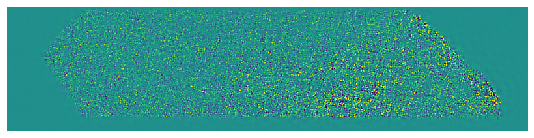

In [24]:
local.show_kmap(Klm,lonra=[145,250],latra=[-5,20],v=v)

In [25]:
klm = pickle.load(open(qobj.f['TT'].alm[1],"rb"))[1]

max,min: 2.0573922256644623 -2.1181820832735525


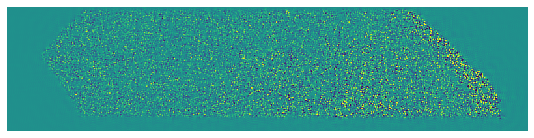

In [26]:
local.show_kmap(klm,lonra=[145,250],latra=[-5,20],v=v)

max,min: 2.5904590808486416 -2.4670743139017923


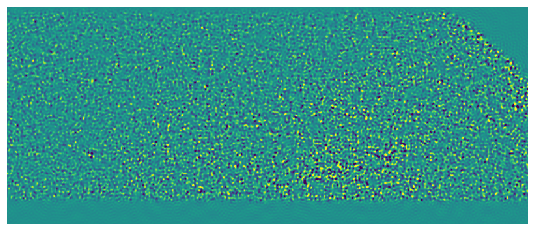

In [27]:
local.show_kmap(Klm,lonra=[160,220],latra=[-5,20],v=v)

max,min: 2.0573922256644623 -2.1181820832735525


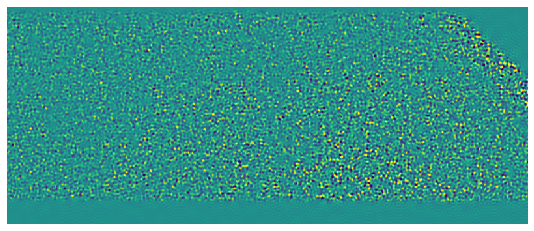

In [28]:
local.show_kmap(klm,lonra=[160,220],latra=[-5,20],v=v)

In [11]:
kkplot(ivar,Klm,klm,mb)

NameError: name 'ivar' is not defined

In [ ]:
kkplot(ivar**3,Klm,klm,mb)

In [ ]:
kkplot(ivar**5,Klm,klm,mb)